In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 优化目标函数中的状态和控制输入的权重
Q = 1
R = 1
# 预测步长
N = 2
# 参数初始化
# 损失函数化为二次标准型计算获得的 控制增益矩阵K
H = np.array([[3, 1], [1, 2]])
# print(H)
# 设置控制输入的上下界
uub = np.ones(N)
ulb = -uub
# 闭环仿真运行的总时间
T = 15

In [7]:
# 控制律函数
def control_law(x):
    # global H, uub, ulb
    # uN = - np.linalg.inv(H) @ np.array([2, 1]).reshape(-1,1) * x
    # uN = np.minimum(uN, uub.reshape(-1,1))
    # uN = np.maximum(uN, ulb.reshape(-1,1))
    # return uN[0,0]
    # 注意广播机制在处理一维数据的时候可以自适应形状
    global H, uub, ulb
    uN = - np.linalg.inv(H) @ np.array([2, 1]) * x
    uN = np.minimum(uN, uub)
    uN = np.maximum(uN, ulb)
    return uN[0]

# 设置初始状态
x0 = 10
# x矩阵初始化，用于存储状态
x = np.zeros(T + 1)
# 设置初始状态
x[0] = x0
# u矩阵初始化，用于存储状态
u = np.zeros(T + 1)
# 时间向量
time = np.arange(T + 1)

# 系统矩阵 A 和 B
A = 1
B = 1

# 代码通过一个循环来模拟系统在每个时间步的状态变化。
for k in range(T + 1):
    u[k] = control_law(x[k])
    # 中断仿真
    if k == T:
        break
    # 更新系统的状态
    x[k + 1] = A * x[k] + B * u[k]

# 评估控制律
# 设置状态变量的最小值和最大值范围
xmin = -3
xmax = -xmin
# 设置状态变量的取样点数为 100
nxs = 100
# 使用 linspace 函数生成从 xmin 到 xmax 的均匀分布的 100 个取样点
xvec = np.linspace(xmin, xmax, nxs)
# 使用 for 循环遍历每个状态变量 xvec(i)，计算对应的控制输入 uvec(i)
uvec = np.array([control_law(xi) for xi in xvec])

In [3]:
import numpy as np

# 一维数组（行向量）
v_row = np.array([2, 1])
print("v_row 的形状:", v_row.shape)  # 输出 (2,)
print("v_row[0]:", v_row[0])  # 输出 2

# 二维数组（列向量）
# 这表示数组有两个维度，第一维有两个元素，每个元素又是一个包含一个元素的一维数组。
v_col = np.array([[2], [1]])
print("v_col 的形状:", v_col.shape)  # 输出 (2, 1)
# v_col[0] 返回的是一个形状为 (1,) 的一维数组 array([2])。
print("v_col[0]:", v_col[0])  # 输出 [2]
# v_col[0, 0] 返回第一个元素的值 2，这是一个标量。
print("v_col[0, 0]:", v_col[0, 0])  # 输出 2


v_row 的形状: (2,)
v_row[0]: 2
v_col 的形状: (2, 1)
v_col[0]: [2]
v_col[0, 0]: 2


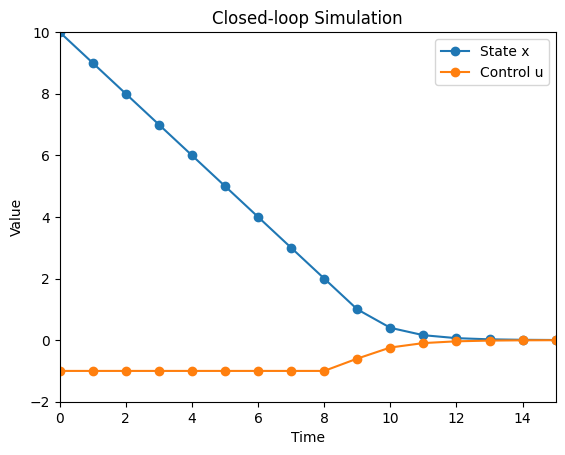

In [8]:
# 绘制图形
plt.figure(1)
plt.plot(time, x, '-o', label='State x')
plt.plot(time, u, '-o', label='Control u')
plt.axis([0, T, -2, 10])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Closed-loop Simulation')
plt.show()

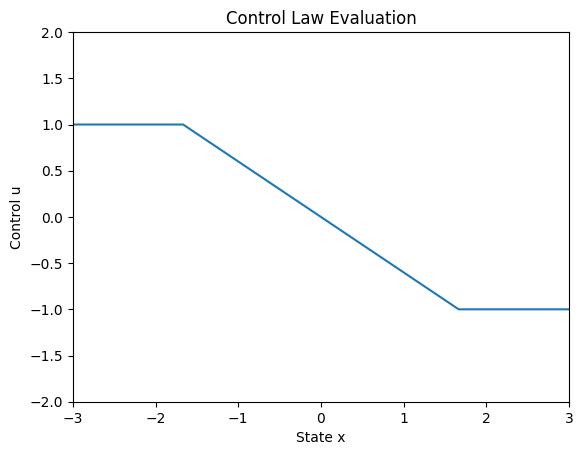

In [9]:
plt.figure(2)
plt.plot(xvec, uvec)
plt.axis([xmin, xmax, 2 * ulb[0], 2 * uub[0]])
plt.xlabel('State x')
plt.ylabel('Control u')
plt.title('Control Law Evaluation')
plt.show()

In [5]:
# 保存数据
data1 = np.column_stack((time, x, u))
data2 = np.column_stack((xvec, uvec))
np.savetxt('lqmpc_data1.dat', data1, header='Time X U', comments='')
np.savetxt('lqmpc_data2.dat', data2, header='Xvec Uvec', comments='')